# Environment Configuration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from transformers import AutoModelForImageClassification, AutoImageProcessor
from PIL import Image

# Model Selection

In [2]:
model_id = "../models/swin-tiny-patch4-window7-224"
image_processor = AutoImageProcessor.from_pretrained(model_id)
model = AutoModelForImageClassification.from_pretrained(model_id)

model

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
  

# Inference

## Single Image Inference

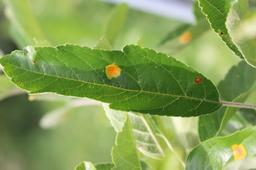

In [3]:
true_label = "Rust"
test_image = Image.open("../dataset/test/Rust/82f49a4a7b9585f1_reduce.jpg")

test_image

In [4]:
def predict_label(image: Image):
    encoding = image_processor(image.convert("RGB"), return_tensors="pt")
    with torch.no_grad():
        outputs = model(**encoding)
        logits = outputs.logits

    predicted_label_id = logits.argmax(-1).item()
    return model.config.id2label[predicted_label_id]

print(f"True label: {true_label} vs. Predicted label: {predict_label(test_image)}")

True label: Rust vs. Predicted label: Rust
